This is the Plant Village dataset from Kaggle which can be downloaded at https://www.kaggle.com/datasets/arjuntejaswi/plant-village.  There are 15 directories of peppers, potatoes and tomatoes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=10

In [4]:
#use tensorflow to download images into tf.data.dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PlantVillage", #this is the data directory
    seed=123,
    shuffle=True,#it will randomly shuffle images and load them 
    image_size=(IMAGE_SIZE,IMAGE_SIZE),#all images are 256 x 256
    batch_size=BATCH_SIZE #32 is standard batch size
)

Found 2152 files belonging to 3 classes.


In [5]:
#3 folder names
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
#every element you get is a tensor so oyu need to convert to numpy
#there are 32 images in each batch
#each image is 256 x 256
#3 is RGB, the channels
#labels are 0 ('Potato___Early_blight'),1 ('Potato___Late_blight'),2 ('Potato___healthy')
#one batch is 32 images
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
(32,)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


In [8]:
#print the 1st image
#it's a tensor.
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[163. 161. 172.]
  [129. 127. 138.]
  [108. 106. 117.]
  ...
  [163. 161. 175.]
  [158. 156. 170.]
  [153. 151. 165.]]

 [[149. 147. 158.]
  [ 98.  96. 107.]
  [144. 142. 153.]
  ...
  [159. 157. 171.]
  [165. 163. 177.]
  [168. 166. 180.]]

 [[100.  98. 109.]
  [117. 115. 126.]
  [188. 186. 199.]
  ...
  [163. 161. 175.]
  [164. 162. 176.]
  [164. 162. 176.]]

 ...

 [[142. 138. 153.]
  [120. 116. 131.]
  [136. 132. 147.]
  ...
  [180. 178. 191.]
  [178. 176. 189.]
  [189. 187. 200.]]

 [[118. 114. 129.]
  [102.  98. 113.]
  [157. 153. 168.]
  ...
  [177. 175. 188.]
  [172. 170. 183.]
  [177. 175. 188.]]

 [[123. 119. 134.]
  [128. 124. 139.]
  [148. 144. 159.]
  ...
  [205. 203. 216.]
  [188. 186. 199.]
  [173. 171. 184.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
#to convert tensor to numpy
#color is represented w/number between 0 and 255
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[161. 146. 151.]
  [147. 132. 137.]
  [143. 128. 133.]
  ...
  [162. 142. 151.]
  [163. 143. 152.]
  [164. 144. 153.]]

 [[146. 131. 136.]
  [147. 132. 137.]
  [145. 130. 135.]
  ...
  [163. 143. 152.]
  [164. 144. 153.]
  [165. 145. 154.]]

 [[145. 130. 135.]
  [147. 132. 137.]
  [147. 132. 137.]
  ...
  [162. 142. 151.]
  [163. 143. 152.]
  [163. 143. 152.]]

 ...

 [[180. 166. 166.]
  [182. 168. 168.]
  [182. 168. 168.]
  ...
  [174. 159. 164.]
  [171. 156. 161.]
  [169. 154. 159.]]

 [[173. 159. 159.]
  [180. 166. 166.]
  [183. 169. 169.]
  ...
  [177. 162. 167.]
  [173. 158. 163.]
  [170. 155. 160.]]

 [[160. 146. 146.]
  [172. 158. 158.]
  [179. 165. 165.]
  ...
  [178. 163. 168.]
  [175. 160. 165.]
  [172. 157. 162.]]]


In [10]:
#shape of 1st image
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


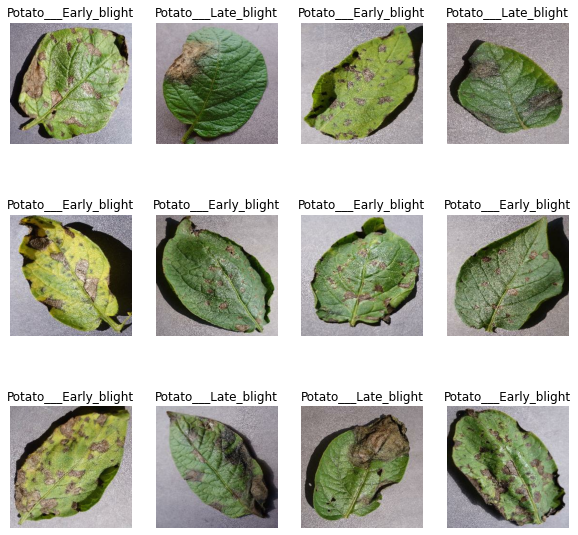

In [11]:
#visualizee image
#shape of 1st image
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12): #display 12 of the batch of 32
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('Off')

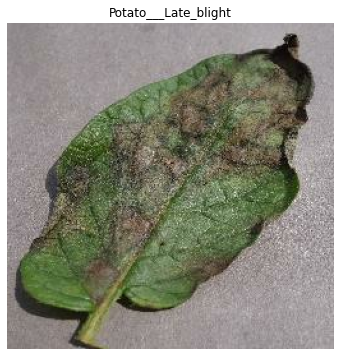

In [12]:
plt.figure(figsize=(6,6))
for image_batch, label_batch in dataset.take(1):
    for i in range(12): #display 12 of the batch of 32
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        #print(image_batch[0].shape)
        plt.axis('Off')

### Split data
Split dataset into train test split

In [13]:
"""
#actual length is 68 into 32 b/c each element is 32 batches
#test split will be further split into validation set
#80% is training
#20% is test --> test(10%), validation -->(10%)
#after every epoch we'll use validation data set to do the validation
#Once we've gone through 50 epochs, then we use test dataset to measure accuracy of our model 
Use test dataset to test performance of our model
length of dataset is 68
"""
train_size = 0.8
len(dataset) * train_size
#dataset.take(10) #take 10 samples

54.400000000000006

In [14]:
#take 1st 54 batches, each batch is 32
train_ds = dataset.take(54) #take 10 samples. Like the 1st 54 arr[:54]
train_ds
len(train_ds)

54

In [15]:
#skipping the 1st 54 and getting the remaining 54
test_ds = dataset.skip(54) #arr[54:]
len(test_ds)

14

In [16]:
val_size = 0.1 #10%.  10% of actual dataset is. 6.8
#need 6 samples from test dataset
len(dataset) * val_size

6.800000000000001

In [17]:
#6 samples
val_ds = test_ds.take(6)
len(val_ds)

6

In [18]:
test_ds = test_ds.skip(6)

In [19]:
len(test_ds)

8

In [20]:
#take tensorflow dataset 
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size =  int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds, test_ds

In [21]:
train_ds,val_ds,  test_ds = get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

54

In [23]:
len(val_ds)

6

In [24]:
len(test_ds)

8

#### Cache, Shuffle and Prefetch the Dataset

In [25]:
"""
cache()-it will read image from the disk, for the next iteration when you need the same image it will keep it in memory
It improves performance of your pipeline
prefetch()-if GPU is training, prefectch will load the next set of batch from your disk which will improve performance
"""
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

### Build a Model
Building a Convolutional Neural Network.  CNNs have 2 parts: convolutional layers and  pooling layers. 

#### Creating a Layer for Resizing and Normalization 
Before we feed our images to network, we need to resize them.  Also, to improve model performance we need to normalize the image pixel value We will keep the pixel value in the range 0 and 1 by dividing by 256.  This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

Why do we need to resize an image (256,256) to (256,256). Sounds redundant but this will be useful when we are done with the training and start using the model for predictions.  We can take an image that is not 256 x 256 and this layer will resize it.

In [26]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

#### Data Augmentation
Data Augmentation is needed when we have less data.  This will boost the accuracy of our model by augmenting the data.

In [27]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

#### 1. Define the neural network architecture.
The first layer will be resize_and_rescale.  Whenever you feed an image into the network the first thing you need to do is resize and rescale it by dividing by 255.  Next is data augmentation.  We use randomRotation to generate a new sample.  The 3rd layer is the convolutional layer.  In the convolutional layer we are going to have 32 layers.  Need a lot of layers so the edges (small features) can be detected.  The 2nd parameter is actual filter size.  A popular activation layer is relu b/c it's very fast to compute.  

Max P:ooling is a layer which preserves the features and redcues the size of the image which can be very helpful computation wise.  In this case we have a MaxPooling layer of size 2D.

Then need to use Flatten layer so the data is an array of neurons.

Softmax activation will normalize the probability of your classes.

In [28]:
input_shape= (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes= 3

model = models.Sequential([
    resize_and_rescale,
    #data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    #Pooling layer
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #Flatten layer
    layers.Flatten(),
    #Dense layer
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [29]:
#Doing back propogation on all the weights: 183,747
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

#### 2. Compile data 
In each epon what type of metric will we use to track the gradient descent.

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

#### 3. Fit the data to the model
Train the network.  Validation data will be used at each epoch to help track the accuracy.  It will train the model first on training data set and measure the accuracy, then on validation set.  

In [31]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/10
54/54 [==============================] - 7s 44ms/step - loss: 0.8294 - accuracy: 0.5897 - val_loss: 0.5587 - val_accuracy: 0.7812
Epoch 2/10
54/54 [==============================] - 1s 20ms/step - loss: 0.4203 - accuracy: 0.8385 - val_loss: 0.2461 - val_accuracy: 0.9010
Epoch 3/10
54/54 [==============================] - 1s 20ms/step - loss: 0.2232 - accuracy: 0.9138 - val_loss: 0.1626 - val_accuracy: 0.9271
Epoch 4/10
54/54 [==============================] - 1s 20ms/step - loss: 0.1784 - accuracy: 0.9265 - val_loss: 0.1171 - val_accuracy: 0.9635
Epoch 5/10
54/54 [==============================] - 1s 20ms/step - loss: 0.1105 - accuracy: 0.9601 - val_loss: 0.0777 - val_accuracy: 0.9740
Epoch 6/10
54/54 [==============================] - 1s 20ms/step - loss: 0.0975 - accuracy: 0.9595 - val_loss: 0.0856 - val_accuracy: 0.9740
Epoch 7/10
54/54 [==============================] - 1s 20ms/step - loss: 0.0912 - accuracy: 0.9635 - val_loss: 0.0499 - val_accuracy: 0.9844
Epoch 8/10
54

In [32]:
#run a test on test dataset
#if you want to find out how well your model is performing try it on test dataset so that it's not biased.
#the model hasn't seen this test dataset.
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 12ms/step - loss: 0.0271 - accuracy: 0.9922


In [33]:
scores

[0.027068430557847023, 0.9921875]

In [34]:
#history is the keras callback history
history

In [35]:
history.params

{'epochs': 10, 'steps': 54, 'verbose': 1}

In [36]:
#get 4 parameters
#for each parameter we have 50 values
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
#a python list of 50 values
#records epochs in the history
history.history['accuracy']

[0.5896990895271301,
 0.8385416865348816,
 0.9137731194496155,
 0.9265046119689941,
 0.9600694179534912,
 0.9594907164573669,
 0.9635416865348816,
 0.9710648059844971,
 0.9797453880310059,
 0.96875]

### Plot Accuracy and Loss Curves
Loss is an error in back propagation that decreases as training proceeds in epochs.

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

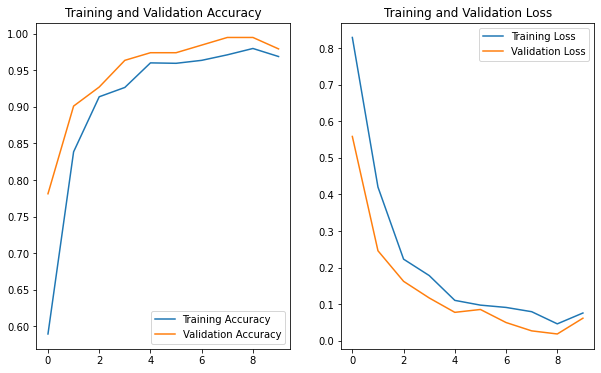

In [39]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Make a Prediction on Sample Image
We're taking 1 batch which will be 32 images.  We'll take 1st image of batch. 

first image to predict
actual label: Potato___Late_blight
[2.6765072e-05 9.9997044e-01 2.7138726e-06]
1
predicted label: Potato___Late_blight


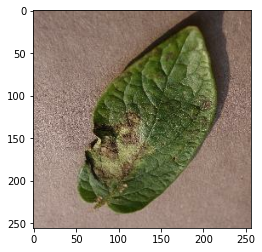

In [40]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch) #this is prediction for 32 images
    print(batch_prediction[0])#softmax is 3 probabilties. there are 3 probabilities.  Highest probability that is the class.
    print(np.argmax(batch_prediction[0]))#this gives the index
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])#prediction for 1st image. convert to class name

first image to predict
actual label: Potato___Early_blight
[7.5779670e-01 2.4220291e-01 3.4362469e-07]
0
predicted label: Potato___Early_blight


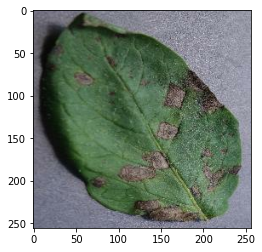

In [41]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[10].numpy().astype('uint8')
    first_label = labels_batch[10].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch) #this is prediction for 32 images
    print(batch_prediction[10])#softmax is 3 probabilties. there are 3 probabilities.  Highest probability that is the class.
    print(np.argmax(batch_prediction[10]))#this gives the index
    print("predicted label:",class_names[np.argmax(batch_prediction[10])])#prediction for 1st image. convert to class name

### Function for inference

In [42]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

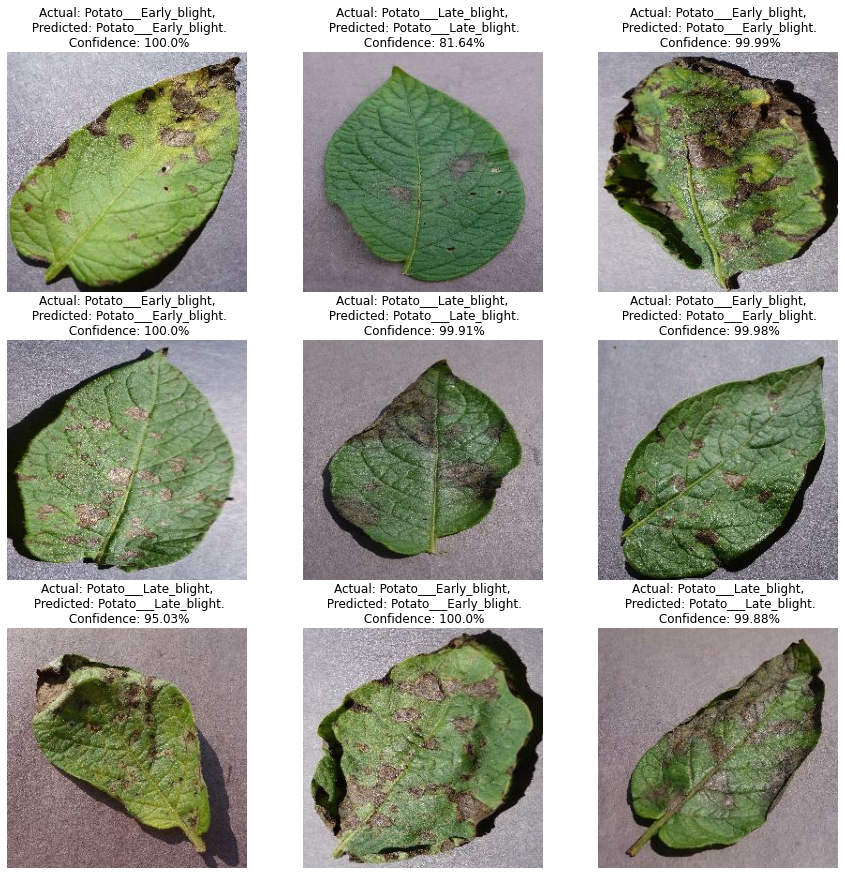

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9): #make predictions on 9 and not the 32 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

### Save the Model
Save the Model in the folder models.  This is how you get your next model version

In [44]:
import os
# model_version=max([int(i) for i in os.listdir("dataset/models") + [0]])+1
# model.save(f"dataset/models/{model_version}")

In [45]:
#model.save('potatoes.h5')

### Full Dataset

In [46]:
EPOCHS = 50

In [47]:
dataset_1 = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/datasets/PlantVillage_full", #this is the data directory
    seed=123,
    shuffle=True,#it will randomly shuffle images and load them 
    image_size=(IMAGE_SIZE,IMAGE_SIZE),#all images are 256 x 256
    batch_size=BATCH_SIZE #32 is standard batch size
)

Found 20638 files belonging to 15 classes.


In [48]:
class_names = dataset_1.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [49]:
for image_batch, label_batch in dataset_1.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
(32,)
[14  9 14  6  3  0  7  6  3 11  9  8  5  3  3  5  5  9 10  6 14 14  2  2
 14  6  5  2  9 12  2  8]


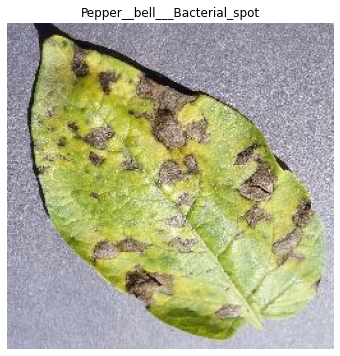

In [50]:
plt.figure(figsize=(6,6))
for image_batch, label_batch in dataset.take(1):
    for i in range(12): #display 12 of the batch of 32
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        #print(image_batch[0].shape)
        plt.axis('Off')

In [51]:
#take tensorflow dataset 
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size =  int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds, test_ds

In [52]:
train_ds,val_ds,  test_ds = get_dataset_partitions_tf(dataset_1)

In [53]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [54]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [55]:
input_shape= (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes= 3

model = models.Sequential([
    resize_and_rescale,
    #data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    #Pooling layer
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #Flatten layer
    layers.Flatten(),
    #Dense layer
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [56]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [57]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
516/516 [==============================] - 494s 39ms/step - loss: nan - accuracy: 0.0488 - val_loss: nan - val_accuracy: 0.0488
Epoch 2/50
516/516 [==============================] - 10s 19ms/step - loss: nan - accuracy: 0.0488 - val_loss: nan - val_accuracy: 0.0488
Epoch 3/50
516/516 [==============================] - 10s 19ms/step - loss: nan - accuracy: 0.0488 - val_loss: nan - val_accuracy: 0.0488
Epoch 4/50
516/516 [==============================] - 10s 19ms/step - loss: nan - accuracy: 0.0488 - val_loss: nan - val_accuracy: 0.0488
Epoch 5/50
516/516 [==============================] - 10s 19ms/step - loss: nan - accuracy: 0.0488 - val_loss: nan - val_accuracy: 0.0488
Epoch 6/50
516/516 [==============================] - 10s 19ms/step - loss: nan - accuracy: 0.0488 - val_loss: nan - val_accuracy: 0.0488
Epoch 7/50
516/516 [==============================] - 10s 19ms/step - loss: nan - accuracy: 0.0488 - val_loss: nan - val_accuracy: 0.0488
Epoch 8/50
516/516 [=============